In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer()

In [3]:
print("Feature names")
print(list(cancer.feature_names), end = "\n\n")
print("Target names")
print(list(cancer.target_names))

Feature names
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

Target names
['malignant', 'benign']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, train_size=0.5, stratify=cancer.target)

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [6]:
training_accuracy = tree.score(X_train, y_train)
test_accuracy = tree.score(X_test, y_test)

print("The training accuracy is: {:.4f}".format(training_accuracy))
print("The test accuracy is: {:.4f}".format(test_accuracy))

The training accuracy is: 0.9683
The test accuracy is: 0.9018


[Text(0.5, 0.8333333333333334, 'worst perimeter <= 105.05\ngini = 0.468\nsamples = 284\nvalue = [106, 178]\nclass = benign'),
 Text(0.25, 0.5, 'worst smoothness <= 0.179\ngini = 0.078\nsamples = 173\nvalue = [7, 166]\nclass = benign'),
 Text(0.125, 0.16666666666666666, 'gini = 0.035\nsamples = 169\nvalue = [3, 166]\nclass = benign'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = malignant'),
 Text(0.75, 0.5, 'worst texture <= 20.045\ngini = 0.193\nsamples = 111\nvalue = [99, 12]\nclass = malignant'),
 Text(0.625, 0.16666666666666666, 'gini = 0.375\nsamples = 12\nvalue = [3, 9]\nclass = benign'),
 Text(0.875, 0.16666666666666666, 'gini = 0.059\nsamples = 99\nvalue = [96, 3]\nclass = malignant')]

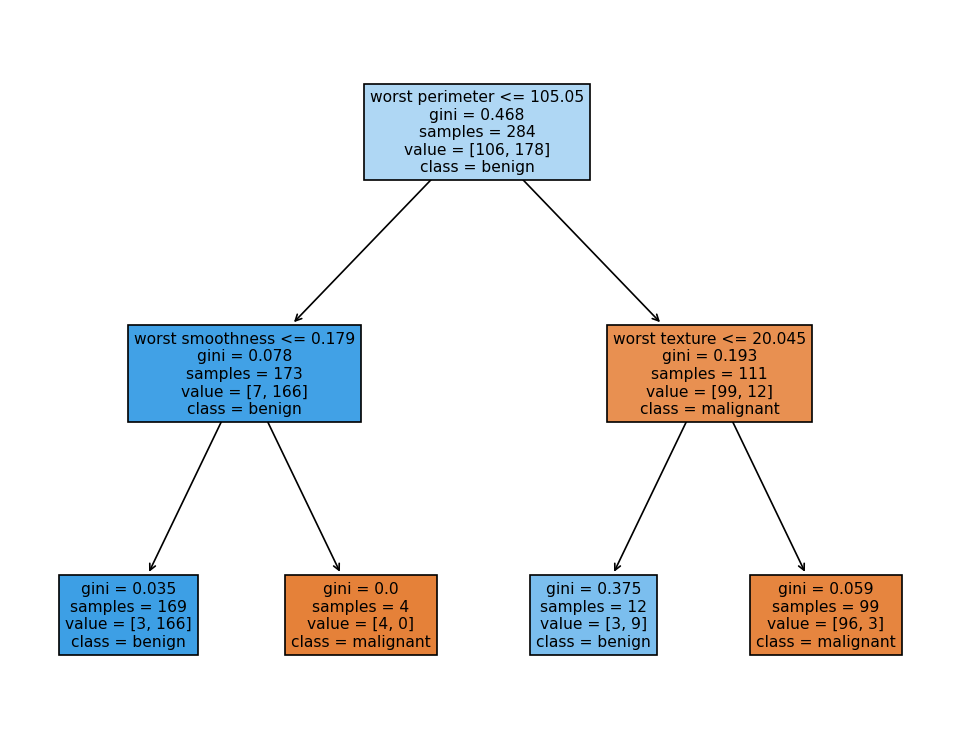

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8), dpi=120)
plot_tree(tree, class_names=cancer.target_names, feature_names=cancer.feature_names, filled=True)

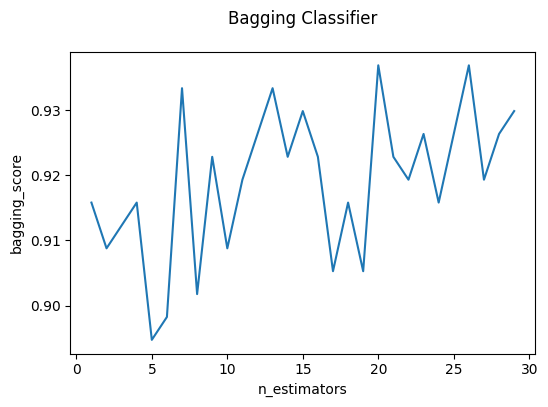

In [8]:
from sklearn.ensemble import BaggingClassifier

estimators = list(range(1, 30))
accuracy = []

for n_estimators in estimators:
    bagging_classifier = BaggingClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=n_estimators)
    bagging_classifier.fit(X_train, y_train)
    acc = bagging_classifier.score(X_test, y_test)
    accuracy.append(acc)

plt.figure(figsize=(6,4), dpi = 100)
plt.plot(estimators, accuracy)
plt.title("Bagging Classifier", pad=20)
plt.xlabel("n_estimators")
plt.ylabel("bagging_score")
plt.show()

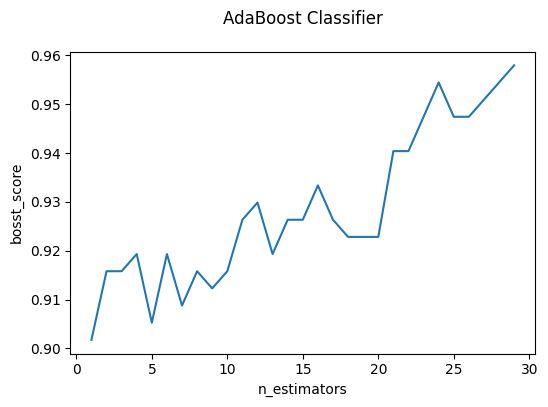

In [9]:
from sklearn.ensemble import AdaBoostClassifier

estimators = list(range(1, 30))
accuracy = []

for n_estimators in estimators:
    ada_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=n_estimators)
    ada_classifier.fit(X_train, y_train)
    acc = ada_classifier.score(X_test, y_test)
    accuracy.append(acc)

plt.figure(figsize=(6,4), dpi = 100)
plt.plot(estimators, accuracy)
plt.title("AdaBoost Classifier", pad=20)
plt.xlabel("n_estimators")
plt.ylabel("bosst_score")
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier

estimators = np.arange(1,101)
features = np.arange(5,31,5)
accuracy = np.zeros((len(estimators), len(features)))

for n_estimators in estimators:
  for max_features in features:
      random_forest = RandomForestClassifier(max_depth=2,n_estimators=n_estimators, max_features=max_features)
      random_forest.fit(X_train, y_train)
      acc = random_forest.score(X_test, y_test)
      accuracy[n_estimators-1][max_features//5-1] = acc

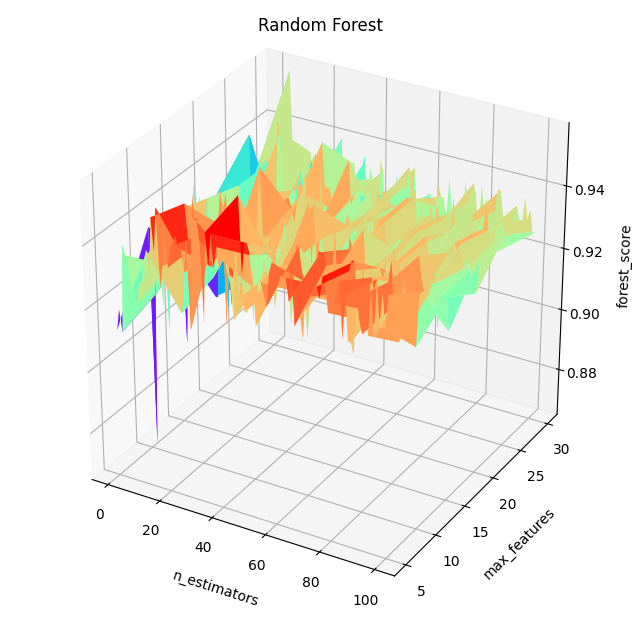

In [14]:
XX, YY = np.meshgrid(estimators, features, indexing='ij')

fig = plt.figure(figsize = (8,8), dpi = 100)
ax = plt.axes(projection='3d')
ax.grid()
ax.plot_surface(XX, YY, accuracy, cmap='rainbow')
ax.set_title('Random Forest', pad=20)

# Set axes label
ax.set_xlabel('n_estimators', labelpad=10)
ax.set_ylabel('max_features', labelpad=10)
ax.set_zlabel('forest_score', labelpad=10)

plt.show()